In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import tree, model_selection, ensemble

#### 1. Data Wrangling

We load the dataset and observe that there are 13580 rows and 21 columns.

In [140]:
# read data
df = pd.read_csv("./data/melb_data_clean.csv", index_col=0)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,h,t,u,Suburb_1
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0,1,0,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13513,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,1,0,0,302
13514,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0,1,0,0,305
13515,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0,1,0,0,305
13516,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0,1,0,0,305


In [18]:
# get the shape of the data
df.shape

(13518, 22)

We start building our first decision tree model. We just use the selected categorical variables first to assess the fit of our linear model.

In [141]:
# selecting 2 vairables based on the info that type of the house and Suburb the house is located in will be able to predict price of the house
X = df.loc[:, ["h", "u", "t", "Suburb_1", "Rooms", "Distance", "Bathroom", "Landsize", "Car"]]
Y = df["Price"]
# need to reshape Y as we need 2d array instead of 1d array for prediction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [142]:
X_train

,h,u,t,Suburb_1,Rooms,Distance,Bathroom,Landsize,Car
12672,1,0,0,80,4,6.7,2.0,301.0,2.0
8811,0,1,0,127,1,5.1,1.0,30.0,0.0
8431,0,0,1,272,3,13.5,3.0,134.0,2.0
5671,1,0,0,259,3,3.3,1.0,211.0,1.0
4357,1,0,0,215,3,2.3,2.0,97.0,1.0
...,...,...,...,...,...,...,...,...,...
905,1,0,0,30,3,13.9,1.0,686.0,2.0
5192,1,0,0,236,2,11.2,1.0,452.0,0.0
12172,1,0,0,269,3,31.7,2.0,563.0,2.0
235,1,0,0,11,5,6.3,2.0,693.0,2.0


In [143]:
print(X_train.shape)
print(X_test.shape)

(10814, 9)
(2704, 9)


## 2. Decision Tree

In [144]:
dt = tree.DecisionTreeRegressor(min_samples_split=10)

In [145]:
model_selection.cross_val_score(dt, X_train, Y_train, cv=5)

array([0.57994381, 0.59298504, 0.54974722, 0.4950395 , 0.53066704])

In [146]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(min_samples_split=10)

In [147]:
print(dt.feature_names_in_)
print(dt.feature_importances_)

['h' 'u' 't' 'Suburb_1' 'Rooms' 'Distance' 'Bathroom' 'Landsize' 'Car']
[0.00683254 0.08751345 0.00237279 0.15342767 0.2168076  0.27049244
 0.06495354 0.18000243 0.01759756]


Getting test accuracy of approx. 64%

In [148]:
dt.score(X_test, Y_test)

0.6391050809379838

Now use gridsearchcv for decision tree

In [149]:
dt = tree.DecisionTreeRegressor()
dt_params = {"min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18]}
dt_grid_search = model_selection.GridSearchCV(dt, dt_params)
dt_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

In [150]:
dt_grid_search.best_estimator_
dt_grid_search.best_params_
dt_grid_search.best_score_

0.5771119976488505

([<matplotlib.axis.XTick at 0x26918d2c490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

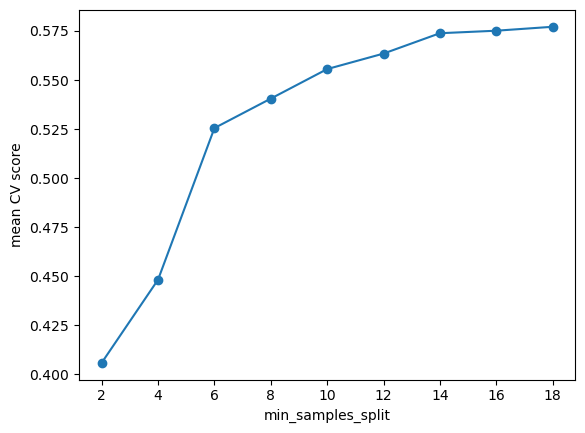

In [151]:
mean_score = dt_grid_search.cv_results_["mean_test_score"]
mean_score = mean_score[~np.isnan(mean_score)]

plt.scatter(dt_params["min_samples_split"], mean_score)
plt.plot(dt_params["min_samples_split"], mean_score)
plt.xlabel("min_samples_split")
plt.ylabel("mean CV score")
plt.xticks(dt_params["min_samples_split"])

Getting 58.6% accuracy for the best params chosen by elbow method from the plot above.

In [158]:
dt_best = tree.DecisionTreeRegressor(min_samples_split=14)
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.5860330197600838

## Extremely Randomized Tree

In [159]:
xt_dt = tree.ExtraTreeRegressor()
xt_dt_params = {"min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18]}
xt_grid_search = model_selection.GridSearchCV(xt_dt, xt_dt_params)
xt_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=ExtraTreeRegressor(),
             param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

([<matplotlib.axis.XTick at 0x269165f4550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

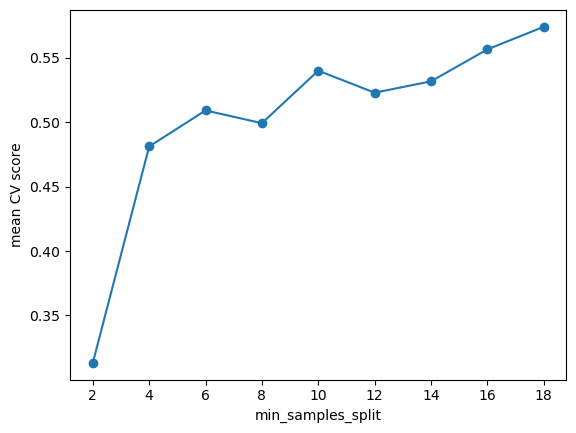

In [160]:
mean_score = xt_grid_search.cv_results_["mean_test_score"]
mean_score = mean_score[~np.isnan(mean_score)]

plt.scatter(xt_dt_params["min_samples_split"], mean_score)
plt.plot(xt_dt_params["min_samples_split"], mean_score)
plt.xlabel("min_samples_split")
plt.ylabel("mean CV score")
plt.xticks(xt_dt_params["min_samples_split"])

The extremely randomized tree is able to produce similar output as the DecisionTreeClassifier.

In [175]:
xt_dt = tree.ExtraTreeRegressor(min_samples_split=10)
xt_dt.fit(X_train, Y_train)
xt_dt.score(X_test, Y_test)

0.6028129426704123

### Random Forest

In [176]:
rf = ensemble.RandomForestRegressor()

max_depth = list(range(2, 9))
n_estimators = list(range(50, 150, 10))
min_samples_split = list(range(2, 18, 2))

rf_params = {"min_samples_split" : min_samples_split, "max_depth": max_depth, "n_estimators": n_estimators}
rf_grid_search = model_selection.GridSearchCV(rf, rf_params, n_jobs=-1)
rf_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140]})

In [177]:
rf_grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 120}

Random Forest Regressor performing very well with approx 68% accuracy.

In [179]:
rf = ensemble.RandomForestRegressor(max_depth=rf_grid_search.best_params_["max_depth"], min_samples_split=rf_grid_search.best_params_["min_samples_split"], n_estimators=rf_grid_search.best_params_["n_estimators"])

rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.684101697875471

In [180]:
# Train on whole dataset and pickle the model.
rf = ensemble.RandomForestRegressor(max_depth=rf_grid_search.best_params_["max_depth"], min_samples_split=rf_grid_search.best_params_["min_samples_split"], n_estimators=rf_grid_search.best_params_["n_estimators"])
rf.fit(X, Y)
rf.score(X_test, Y_test)

0.7430201878227797

In [181]:
rf.predict(np.array(X_test.iloc[0,:]).reshape(1,-1))

C:\Users\nilu1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([962874.08697727])

In [182]:
pickle.dump(rf, open("./model/randomforest.pkl", "wb"))